# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [6]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [7]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [66]:
scores = net.loss(X)
print 'Your scores:'
print scores
print
print 'correct scores:'
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print correct_scores
print

# The difference should be very small. We get < 1e-7
print 'Difference between your scores and correct scores:'
print np.sum(np.abs(scores - correct_scores))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027208769e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [67]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133
print loss

# should be very small, we get < 1e-12
print 'Difference between your loss and correct loss:'
print np.sum(np.abs(loss - correct_loss))

1.30378789133
Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [69]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
  print param_grad_num
  print grads[param_name]
  print '%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

[ 0.2099691 -0.1431905 -0.0667786]
[ 0.2099691 -0.1431905 -0.0667786]
b2 max relative error: 4.447646e-11
[[ -5.13764691e-01   1.67232930e-01   3.04783350e-01]
 [  1.95077540e-02  -5.09652182e-03  -4.38074301e-03]
 [  2.92229174e-01   1.18896894e-01  -4.32018096e-01]
 [ -2.33121075e-01   1.86288200e-01   3.96198312e-02]
 [  7.78174796e-01  -3.54233027e-01  -4.41137965e-01]
 [  4.28331870e-03   6.65172228e-04   3.02471898e-03]
 [ -6.34322094e-03  -3.62741166e-03  -6.72460447e-03]
 [  6.17281609e-02  -1.29900489e-01   3.91825078e-02]
 [  6.32053946e-01  -8.44023525e-02  -5.66197124e-01]
 [  8.89334995e-01  -6.04709348e-01  -2.88551353e-01]]
[[ -5.13764691e-01   1.67232930e-01   3.04783350e-01]
 [  1.95077540e-02  -5.09652182e-03  -4.38074302e-03]
 [  2.92229174e-01   1.18896894e-01  -4.32018096e-01]
 [ -2.33121075e-01   1.86288200e-01   3.96198312e-02]
 [  7.78174796e-01  -3.54233027e-01  -4.41137965e-01]
 [  4.28331871e-03   6.65172224e-04   3.02471898e-03]
 [ -6.34322094e-03  -3.627411

# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


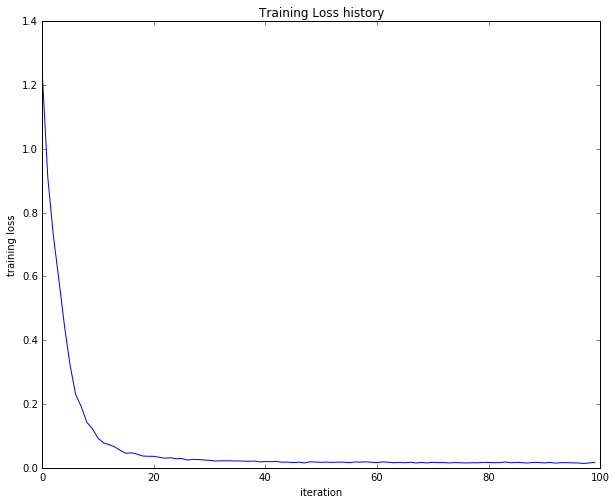

In [74]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print 'Final training loss: ', stats['loss_history'][-1]

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [75]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [135]:
input_size = 32 * 32 * 3
num_classes = 10
#lr: 2.528424e-03 lrd: 0.848835 rs: 1.460677e-03 hs: 129 ValAcc: 0.509000
#lr: 1.521123e-03 lrd: 0.837687 rs: 3.720266e-03 hs: 76 ValAcc: 0.510000
#lr: 2.826258e-03 lrd: 0.684862 rs: 3.480997e-02 hs: 112 ValAcc: 0.516000

hidden_size = 112
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=500,
            learning_rate=2.826258e-03, learning_rate_decay=0.684862,
            reg=3.480997e-02, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc


iteration 0 / 1000: loss 2.302640
    train_acc: 0.218000 val_acc: 0.171000
    train_acc: 0.380000 val_acc: 0.379000
iteration 100 / 1000: loss 1.744975
    train_acc: 0.462000 val_acc: 0.427000
iteration 200 / 1000: loss 1.654030
    train_acc: 0.442000 val_acc: 0.457000
iteration 300 / 1000: loss 1.559147
    train_acc: 0.472000 val_acc: 0.468000
iteration 400 / 1000: loss 1.470330
    train_acc: 0.456000 val_acc: 0.469000
iteration 500 / 1000: loss 1.575920
    train_acc: 0.528000 val_acc: 0.462000
iteration 600 / 1000: loss 1.417642
    train_acc: 0.540000 val_acc: 0.471000
iteration 700 / 1000: loss 1.385957
    train_acc: 0.488000 val_acc: 0.478000
iteration 800 / 1000: loss 1.356805
    train_acc: 0.486000 val_acc: 0.471000
iteration 900 / 1000: loss 1.521964
    train_acc: 0.506000 val_acc: 0.467000
Validation accuracy:  0.469


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

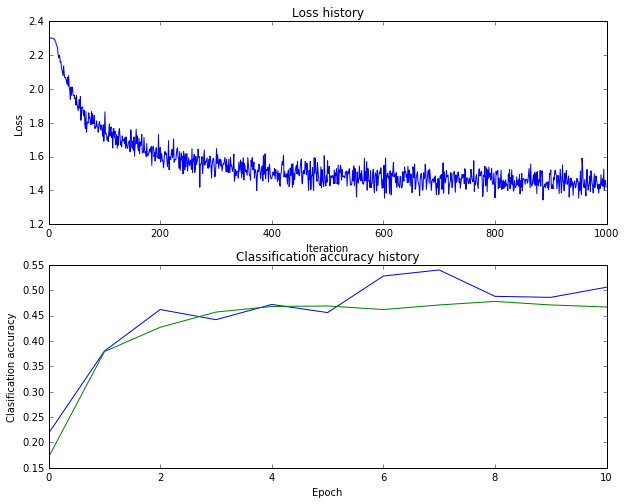

In [136]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

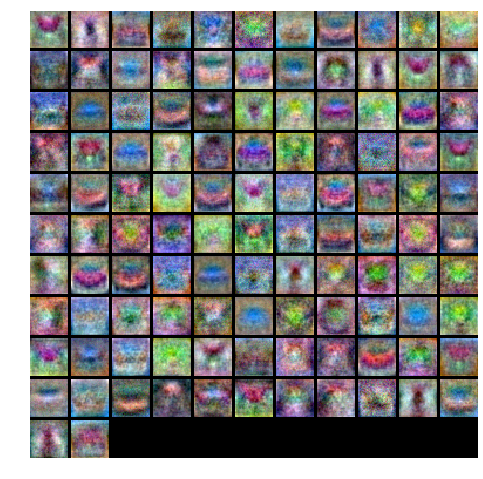

In [137]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [117]:
print "%e" % (10**-3.25)

5.623413e-04


In [138]:
best_net = None # store the best model into this
best_val = 0.0

input_size = 32 * 32 * 3
num_classes = 10

#lr: 5.102641e-04 lrd: 0.837585 rs: 7.287437e-03 hs: 161 ValAcc: 0.384000
#lr: 9.987921e-04 lrd: 0.685098 rs: 4.290158e-03 hs: 124 ValAcc: 0.419000
#lr: 6.952549e-04 lrd: 0.967861 rs: 3.437109e-03 hs: 70 ValAcc: 0.420000
#lr: 8.730389e-04 lrd: 0.730608 rs: 1.063658e-02 hs: 79 ValAcc: 0.427000
#lr: 8.847036e-04 lrd: 0.855476 rs: 9.158641e-03 hs: 52 ValAcc: 0.436000

#lr: 9.769228e-04 lrd: 0.642369 rs: 3.491576e-02 hs: 58 ValAcc: 0.416000
#lr: 6.004580e-04 lrd: 0.855561 rs: 8.184069e-03 hs: 104 ValAcc: 0.424000
#lr: 1.136258e-03 lrd: 0.614891 rs: 3.355244e-03 hs: 142 ValAcc: 0.435000
#lr: 1.208357e-03 lrd: 0.855845 rs: 3.733858e-02 hs: 99 ValAcc: 0.444000
#lr: 1.533891e-03 lrd: 0.747388 rs: 3.434755e-03 hs: 60 ValAcc: 0.446000
#lr: 1.340328e-03 lrd: 0.694915 rs: 6.852191e-03 hs: 102 ValAcc: 0.450000
#lr: 1.580627e-03 lrd: 0.767952 rs: 9.560307e-03 hs: 76 ValAcc: 0.451000
#lr: 1.390298e-03 lrd: 0.731670 rs: 2.633263e-03 hs: 88 ValAcc: 0.456000

#lr: 2.363839e-03 lrd: 0.703336 rs: 3.851166e-02 hs: 139 ValAcc: 0.494000
#lr: 2.326768e-03 lrd: 0.825264 rs: 1.152321e-02 hs: 108 ValAcc: 0.503000
#lr: 2.780276e-03 lrd: 0.685231 rs: 6.187842e-03 hs: 149 ValAcc: 0.510000
#lr: 2.097784e-03 lrd: 0.801390 rs: 3.755726e-03 hs: 137 ValAcc: 0.510000
#lr: 2.528424e-03 lrd: 0.848835 rs: 1.460677e-03 hs: 129 ValAcc: 0.509000
#lr: 1.521123e-03 lrd: 0.837687 rs: 3.720266e-03 hs: 76 ValAcc: 0.510000
#lr: 2.826258e-03 lrd: 0.684862 rs: 3.480997e-02 hs: 112 ValAcc: 0.516000

learning_rates = [-3.25, -2.5]
learning_rate_decays = [0.6, 0.99]
regularization = [-3, -1]
hidden_size = [50, 150]

num_iters = 1000
batch_size = 500

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
for i in range(50):
  lr = 10**np.random.uniform(learning_rates[0], learning_rates[1])
  lrd = np.random.uniform(learning_rate_decays[0], learning_rate_decays[1])
  rs = 10**np.random.uniform(regularization[0], regularization[1])
  hs = np.random.uniform(hidden_size[0], hidden_size[1])

  net = TwoLayerNet(input_size, hs, num_classes)

  # Train the network
  stats = net.train(X_train, y_train, X_val, y_val,
                    num_iters=num_iters, batch_size=batch_size,
                    learning_rate=lr, learning_rate_decay=lrd,
                    reg=rs, verbose=True)

  # Predict on the validation set
  val_acc = (net.predict(X_val) == y_val).mean()

  print "lr: %e lrd: %f rs: %e hs: %d ValAcc: %f" % (lr, lrd, rs, hs, val_acc)
  if (val_acc > best_val):
    best_val = val_acc
    best_net = net
    print "Best so far! ^^^^^"
  print ""

                    
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 1000: loss 2.302604
    train_acc: 0.188000 val_acc: 0.142000
    train_acc: 0.230000 val_acc: 0.219000
iteration 100 / 1000: loss 2.153229
    train_acc: 0.248000 val_acc: 0.254000
iteration 200 / 1000: loss 2.010872
    train_acc: 0.310000 val_acc: 0.275000
iteration 300 / 1000: loss 1.923761
    train_acc: 0.284000 val_acc: 0.283000
iteration 400 / 1000: loss 1.937209
    train_acc: 0.278000 val_acc: 0.293000
iteration 500 / 1000: loss 1.933168
    train_acc: 0.284000 val_acc: 0.302000
iteration 600 / 1000: loss 1.866665
    train_acc: 0.328000 val_acc: 0.301000
iteration 700 / 1000: loss 1.888808
    train_acc: 0.306000 val_acc: 0.299000
iteration 800 / 1000: loss 1.846747
    train_acc: 0.316000 val_acc: 0.300000
iteration 900 / 1000: loss 1.913443
    train_acc: 0.268000 val_acc: 0.302000
lr: 6.559766e-04 lrd: 0.605121 rs: 1.972697e-02 hs: 110 ValAcc: 0.302000
Best so far! ^^^^^

iteration 0 / 1000: loss 2.302656
    train_acc: 0.152000 val_acc: 0.151000
    train_a

KeyboardInterrupt: 

iteration 0 / 1000: loss 2.302561
    train_acc: 0.189000 val_acc: 0.168000
    train_acc: 0.288000 val_acc: 0.279000
    train_acc: 0.339000 val_acc: 0.325000
iteration 100 / 1000: loss 1.861850
    train_acc: 0.380000 val_acc: 0.363000
    train_acc: 0.339000 val_acc: 0.376000
iteration 200 / 1000: loss 1.776832
    train_acc: 0.389000 val_acc: 0.377000
    train_acc: 0.393000 val_acc: 0.386000
iteration 300 / 1000: loss 1.700787
    train_acc: 0.386000 val_acc: 0.391000
    train_acc: 0.454000 val_acc: 0.390000
iteration 400 / 1000: loss 1.726829
    train_acc: 0.388000 val_acc: 0.390000
    train_acc: 0.389000 val_acc: 0.390000
iteration 500 / 1000: loss 1.706518
    train_acc: 0.405000 val_acc: 0.393000
    train_acc: 0.412000 val_acc: 0.394000
iteration 600 / 1000: loss 1.681864
    train_acc: 0.399000 val_acc: 0.395000
    train_acc: 0.434000 val_acc: 0.396000
iteration 700 / 1000: loss 1.674133
    train_acc: 0.411000 val_acc: 0.395000
    train_acc: 0.415000 val_acc: 0.395000


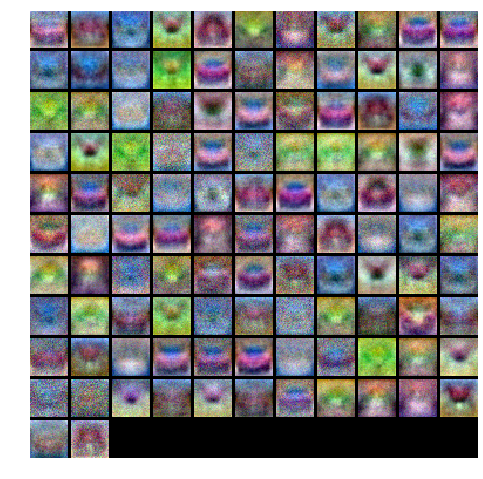

In [130]:
#lr: 2.826258e-03 lrd: 0.684862 rs: 3.480997e-02 hs: 112 ValAcc: 0.516000
net = TwoLayerNet(input_size, 112, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
                    num_iters=1000, batch_size=1000,
                    learning_rate=2.1e-03, learning_rate_decay=0.684862,
                    reg=2.86e-03, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()

print val_acc

show_net_weights(net)

In [123]:
test_acc = (net.predict(X_test) == y_test).mean()
print 'Test accuracy: ', test_acc

Test accuracy:  0.508


In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [120]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print 'Test accuracy: ', test_acc

Test accuracy:  0.429
